In [1]:
>>> import fafbseg
>>> import navis

In [2]:
>>> import numpy as np

>>> # The location from the clipboard
>>> pos = np.array([[249960, 184691.375, 174240]])

In [3]:
>>> navis.xform_brain(pos, source="FAFB14", target="FLYWIREraw")

Transform path: FAFB14 -> FAFB14raw -> FLYWIREraw


array([[62648.5    , 46291.34375,  4356.     ]])

In [4]:
>>> fafbseg.xform.fafb14_to_flywire(pos, coordinates="nm")

array([[250594.  , 185165.38, 174240.  ]], dtype=float32)

In [5]:
>>> import pymaid

>>> # Connect to the VirtualFlyBrain's public CATMAID instance
>>> cn = pymaid.CatmaidInstance(
...     server="https://fafb.catmaid.virtualflybrain.org/", project_id=1, api_token=None
... )

>>> # Load a neuron
>>> n = pymaid.get_neuron(16)

>>> # Xform the neuron - note we stay in nanometer space for now
>>> xf = navis.xform_brain(n, source="FAFB14", target="FLYWIRE")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


Transform path: FAFB14 -> FAFB14raw -> FLYWIREraw -> FLYWIRE


Plot neurons:   0%|          | 0/2 [00:00<?, ?it/s]

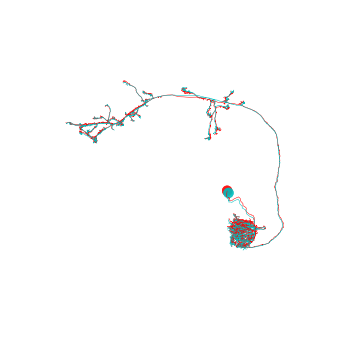

In [7]:
>>> # Co-visualize the original (FAFB space) and the transformed (FlyWire space) neurons
>>> fig, ax = navis.plot2d([n, xf], color=["r", "c"], lw=0.5, method='3d_complex')
>>> ax.azim = ax.elev = -90